## Metrics comparison and finding idea K for Knn
### The core feature of movie rating recommendation is user-based collaborative filteration engine. It leverages on KNN algorithm to find K closest users based on their rating values on other movies and estimates rating by calculating weighted average from their rating values.
### In order to determine right distance metric type and K value to be used in the KNN algorithm in systematic approach, I ran a series of MAE calculations by using following test script which instantiates the app and injects various number of K value and distance metric configuration. Then, it loops through all the rating value for every combination of user and movie, and calculates MAE value overall. Note that it only select 5% those rating points to reduce overall runtime.    

In [1]:
import sklearn
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from App import App

In [2]:
df_ratmat = pd.read_csv(
            "movielens/Movielens-02/data_matrix.csv", index_col=0)
ratmat = np.mat(df_ratmat)

In [3]:
def test_dataset(app, dataMat, K):
    total_errors = 0.0
    total_count = 0
    number_of_items = np.shape(dataMat)[1]
    for user in range(len(dataMat)):
        for item in range(number_of_items):
            rating = dataMat[user, item]
            if rating == 0:
                continue
            # user id is 1 based, but dataset has extra record of user_id = 0
            # movie id is 1-based
            estimatedRating = app.bs_recommend.recommend_rating(user, item + 1, K)
            total_errors += abs(estimatedRating - rating)
            total_count += 1
    MAE = total_errors / total_count
    print('Mean Absoloute Error for K=', K, ' : ', MAE)
    return MAE

In [4]:
def find_ideal_K(app, dataMat):
    maes = []
    for k in range(1,21):
        maes.append(test_dataset(app, dataMat, k))
    plt.figure(figsize=(10,2))
    plt.plot(range(1,21),maes,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('MAE vs. K Value')
    plt.xlabel('K')
    plt.ylabel('MAE')
    print("Minimum MAE:",min(maes),"at K =",maes.index(min(maes)) + 1)

#### Expedite evaluation performance, clear out some randomly selected ratings. Note that actual rating dataset is not affected since it's contained inside App object. 

In [5]:
from random import random
# seeded based on realtime clock
n_row = ratmat.shape[0]
n_col = ratmat.shape[1]
for user in range(n_row):
    for item in range(n_col):
        rating = ratmat[user, item]
        if rating == 0:
            continue
        # take 5% of rating data
        if random() >= 0.05:
            ratmat[user, item] = 0.0

### Cosine distance metric

In [6]:
# load instance with real data, similarity metric = cosine
app = App()
app.configure(knn_sim_metric="cosine")

Mean Absoloute Error for K= 1  :  0.9710378117457763
Mean Absoloute Error for K= 2  :  0.8765226941345803
Mean Absoloute Error for K= 3  :  0.8470397730799245
Mean Absoloute Error for K= 4  :  0.8326583450380534
Mean Absoloute Error for K= 5  :  0.8193878314963194
Mean Absoloute Error for K= 6  :  0.8117893213882154
Mean Absoloute Error for K= 7  :  0.8078122793731218
Mean Absoloute Error for K= 8  :  0.803830583764848
Mean Absoloute Error for K= 9  :  0.8010698643145272
Mean Absoloute Error for K= 10  :  0.7991664747865166
Mean Absoloute Error for K= 11  :  0.7958976328397263
Mean Absoloute Error for K= 12  :  0.7947446532634113
Mean Absoloute Error for K= 13  :  0.7941016258800035
Mean Absoloute Error for K= 14  :  0.7927660722989021
Mean Absoloute Error for K= 15  :  0.7925123326944467
Mean Absoloute Error for K= 16  :  0.7910885206042387
Mean Absoloute Error for K= 17  :  0.7903145261040284
Mean Absoloute Error for K= 18  :  0.7896506706895702
Mean Absoloute Error for K= 19  :  0.7

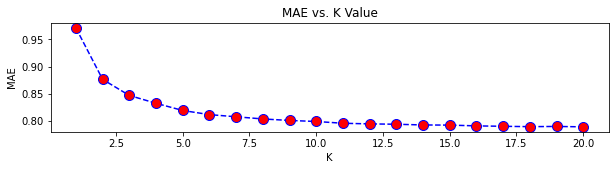

In [7]:
find_ideal_K(app, ratmat)

#### Ideal number could be around 10

### Euclidean metric

In [6]:
# load instance with real data, similarity metric = euclidean
app = App()
app.configure(knn_sim_metric="euclidean")

Mean Absoloute Error for K= 1  :  1.025179856115108
Mean Absoloute Error for K= 2  :  0.9378885295587762
Mean Absoloute Error for K= 3  :  0.8952806546040882
Mean Absoloute Error for K= 4  :  0.8726542365226528
Mean Absoloute Error for K= 5  :  0.8549552660221978
Mean Absoloute Error for K= 6  :  0.8523569956032481
Mean Absoloute Error for K= 7  :  0.8442040331330986
Mean Absoloute Error for K= 8  :  0.8405467289020756
Mean Absoloute Error for K= 9  :  0.8359682086875458
Mean Absoloute Error for K= 10  :  0.8318837540864488
Mean Absoloute Error for K= 11  :  0.8284985314992015
Mean Absoloute Error for K= 12  :  0.8248926901498134
Mean Absoloute Error for K= 13  :  0.8223575441215483
Mean Absoloute Error for K= 14  :  0.8221743943662453
Mean Absoloute Error for K= 15  :  0.8206532890147247
Mean Absoloute Error for K= 16  :  0.8205724344563793
Mean Absoloute Error for K= 17  :  0.8195822021971064
Mean Absoloute Error for K= 18  :  0.819185871093309
Mean Absoloute Error for K= 19  :  0.81

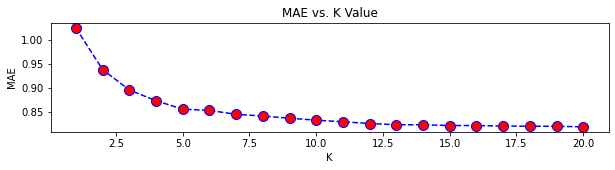

In [7]:
find_ideal_K(app, ratmat)

### Pearson correlation metric

In [14]:
# load instance with real data, similarity metric = pearson correlation
app = App()
app.configure(knn_sim_metric="correlation")

Mean Absoloute Error for K= 1  :  0.9583249039045114
Mean Absoloute Error for K= 2  :  0.8774232256015583
Mean Absoloute Error for K= 3  :  0.8525691172201892
Mean Absoloute Error for K= 4  :  0.838480402862594
Mean Absoloute Error for K= 5  :  0.8277774437846569
Mean Absoloute Error for K= 6  :  0.8203415647198389
Mean Absoloute Error for K= 7  :  0.8115064416591217
Mean Absoloute Error for K= 8  :  0.8067767108647264
Mean Absoloute Error for K= 9  :  0.8046151865227777
Mean Absoloute Error for K= 10  :  0.8029638844021081
Mean Absoloute Error for K= 11  :  0.7993218029605805
Mean Absoloute Error for K= 12  :  0.7982422647842495
Mean Absoloute Error for K= 13  :  0.7971919587420124
Mean Absoloute Error for K= 14  :  0.7955407662094411
Mean Absoloute Error for K= 15  :  0.7954418200968084
Mean Absoloute Error for K= 16  :  0.7956506021229611
Mean Absoloute Error for K= 17  :  0.7941960381975182
Mean Absoloute Error for K= 18  :  0.7923780252910361
Mean Absoloute Error for K= 19  :  0.7

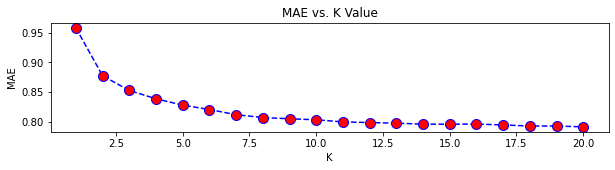

In [15]:
find_ideal_K(app, ratmat)

#### Ideal number could be about K = 10 and metric = 'correlation'

## Finding optimal minimum number of ratings required for a user to estimate reliably 
### MAE comparison is an immediate idea on this purpose again. I setup following test steps to achieve the evaluation goal.
### a) For each user in the dataset
### b) Iterate over a range of numbers from 1 to its total number of ratings that user has
### c) randomly select and use only that number of ratings to estimate against all the movies for those rated but not used in this calculation (here I can limit by fixed number of cases to reduce overall runtime)
### d) compare average MAE values for each number of ratings used

In [5]:
# load instance with real data, similarity metric = pearson correlation
app = App()
app.configure(knn_sim_metric="correlation")

In [13]:
def find_minimum_N_rating_needed(app, dataMat, K):
    n_items = np.shape(dataMat)[1]
    total_errors = [0.0 for i in range(n_items)]
    total_count = [0 for i in range(n_items)]
    for user in range(len(dataMat)):
        uv = np.copy(dataMat[user])
        rated = np.nonzero(uv)[1]
        copy_rated = np.copy(rated)
        # skip user with rated one or less movie
        if len(rated) <= 1: 
            continue
        #print("user:", user, ", vector:", uv)
        num_rating = len(rated)
        #print("num_rating:", num_rating)
        for n in range(num_rating, 0, -1):
            #print(n, end =" ")
            # limit N rating upto 200 ratings
            if n <= 200:
                count = 0
                for movie in copy_rated:
                    if movie in rated:
                        # only estimate for rated but not in current vector
                        continue
                    if count > 10 or random.random() >= 0.2:
                        # only test 20% or 10 cases for runtime benefit
                        continue
                    rating = dataMat[user, movie]
                    # user id is 1 based, but dataset has extra record of user_id = 0
                    # movie id is 1-based
                    count += 1
                    estimatedRating = app.bs_recommend.recommend_rating(user, movie + 1, K, uv)
                    total_errors[n] += abs(estimatedRating - rating)
                    total_count[n] += 1
            # randomly remove 1 rating
            idx = random.randint(0, n - 1)
            uv[0, rated[idx]] = 0
            rated = np.delete(rated, [idx])
        #print()
    print('Mean Absoloute Error for K=', K)
    maes = []
    for i in range(n_items):
        if total_count[i] == 0:
            continue
        MAE = total_errors[i] / total_count[i]
        print('Mean Absoloute Error for n_rating=', i, ' : ', MAE)
        maes.append((i, MAE))
    plt.figure(figsize=(10,2))
    m = [x[1] for x in maes]
    plt.plot(range(1,len(maes)+1),m,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('MAE vs. Number of Ratings')
    plt.xlabel('Number of Ratings')
    plt.ylabel('MAE')
    print("Minimum MAE:",min(m),"at n ratings =",maes[m.index(min(m))][0])

Mean Absoloute Error for K= 10
Mean Absoloute Error for n_rating= 1  :  0.8496129067738422
Mean Absoloute Error for n_rating= 2  :  0.8399260464424527
Mean Absoloute Error for n_rating= 3  :  0.8487879043578515
Mean Absoloute Error for n_rating= 4  :  0.8340780765376408
Mean Absoloute Error for n_rating= 5  :  0.8332761401408164
Mean Absoloute Error for n_rating= 6  :  0.835121245565285
Mean Absoloute Error for n_rating= 7  :  0.8417996169970576
Mean Absoloute Error for n_rating= 8  :  0.8257112518868056
Mean Absoloute Error for n_rating= 9  :  0.8291496970645245
Mean Absoloute Error for n_rating= 10  :  0.8351328601705321
Mean Absoloute Error for n_rating= 11  :  0.8296453939124488
Mean Absoloute Error for n_rating= 12  :  0.8370875347746729
Mean Absoloute Error for n_rating= 13  :  0.8332828708133235
Mean Absoloute Error for n_rating= 14  :  0.8208558024032728
Mean Absoloute Error for n_rating= 15  :  0.8298579921414102
Mean Absoloute Error for n_rating= 16  :  0.8290171434553568
Mea

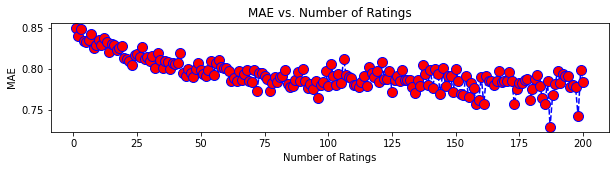

In [14]:
ratmat = np.mat(df_ratmat)
find_minimum_N_rating_needed(app, ratmat, 10)

### According to above result, with some outlier at minimum value, overall MAE graph show stable inclination from the beginning thru 100. After this number, the results are not converge nor showing clear pattern of decrement. So I think 80~100 is a good number of ratings it can estimate the rating reliably.